#Author : Saswat Swain
#E-mail : Saswatswain20@gmail.com
#Designation : Project Engineer,Wipro Limited
#The algorithm is used for detecting the classes in iris dataset

Repositori ini mencakup:

Impor pustaka dan dataset

Pembagian data menjadi pelatihan dan pengujian

Pra-pemrosesan dan standarisasi data

Pelatihan model KNN

Evaluasi model​

Import the Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)


In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Train-Test Split

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Pre-Processing and Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

K-Nearest Neighbours Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

Predictions & Evaluations

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



Detection of Optimal Value for K Neighnours

In [11]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

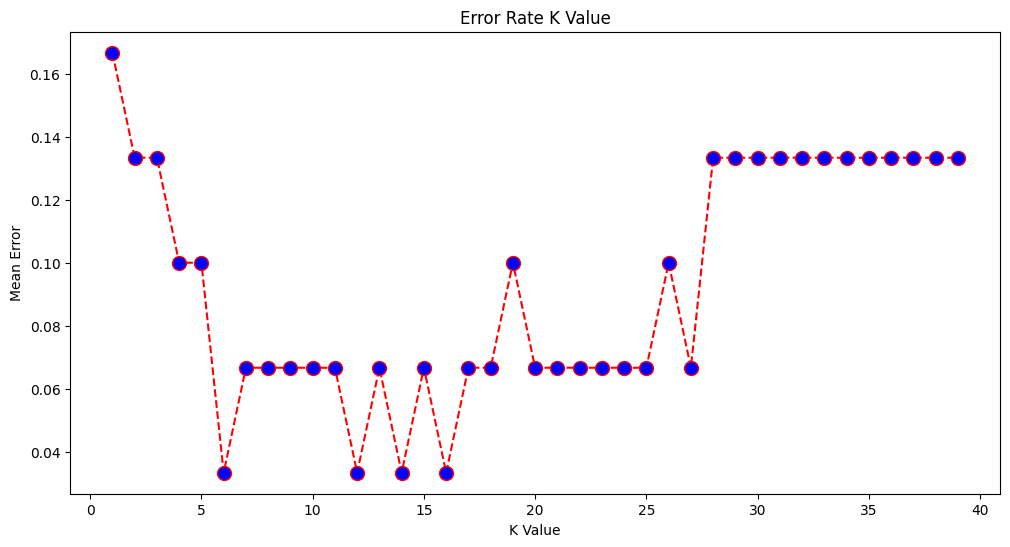

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

Setelah di Modifikasi

Modifikasi yang dilakukan:
Visualisasi Distribusi Kelas:

Menambahkan plot batang (bar plot) menggunakan seaborn.countplot() untuk menunjukkan distribusi jumlah data per kelas (Iris setosa, versicolor, virginica).

Standarisasi Fitur:

Menggunakan StandardScaler dari sklearn.preprocessing untuk melakukan normalisasi fitur sebelum pelatihan, agar jarak antar titik data menjadi lebih seimbang untuk algoritma KNN.

Visualisasi Confusion Matrix:

Menambahkan heatmap menggunakan seaborn.heatmap() untuk menampilkan hasil klasifikasi dengan lebih informatif (aktual vs prediksi).

Komentar Lebih Informatif dan Terstruktur:

Setiap bagian diberi komentar yang menjelaskan fungsinya, sehingga kode lebih mudah dibaca dan dipahami.

Output Akurasi yang Lebih Informatif:

Cetakan akurasi model menggunakan print() dengan format yang rapi dan jelas menunjukkan nilai K yang digunakan.

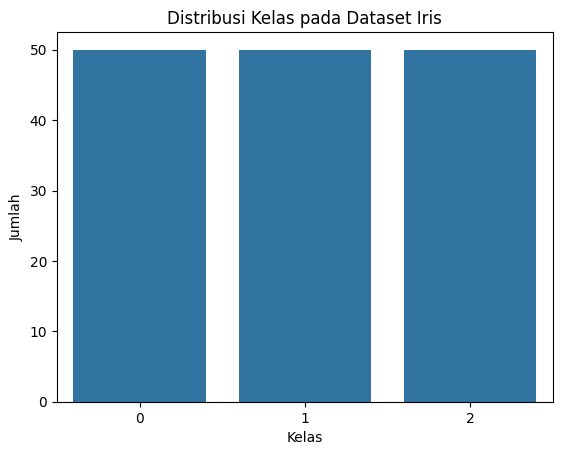

Akurasi model dengan k=5: 1.00


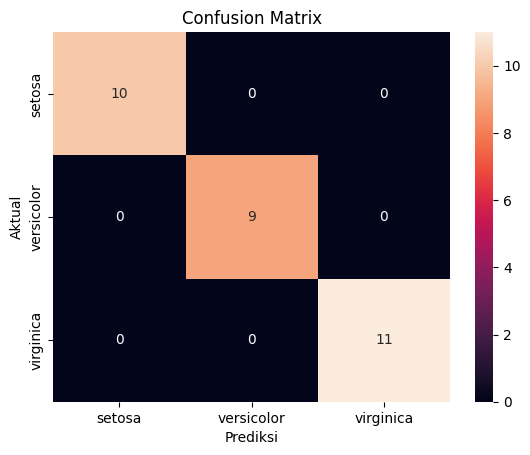

In [13]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Muat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Konversi ke DataFrame untuk eksplorasi
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Visualisasi distribusi kelas
sns.countplot(x='target', data=df)
plt.title('Distribusi Kelas pada Dataset Iris')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Inisialisasi dan latih model KNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = knn.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model dengan k={k}: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()
